In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

sns.set()

## Import preprocessed data

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,ID,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
0,10000,3.083333,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-0.490868,1.15,1.866571,0.763419,9.579365,-0.201465,1
1,10001,0.500000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.285388,-0.20,0.104392,-0.204771,0.198413,-0.501832,1
2,10002,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-0.554795,0.50,0.000000,1.208748,0.000000,0.619048,0
3,10003,-1.166667,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,-0.257991,0.35,0.239981,0.463221,0.992063,-0.300366,0
4,10004,1.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.152968,-0.50,0.000000,-0.255467,0.000000,-0.600733,0


In [4]:
df.columns

Index(['ID', 'Age', 'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout',
       'Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Freq_Classes_Contract', 'Visits_ActivePeriod',
       'Gender_Female'],
      dtype='object')

In [5]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Freq_Classes_Contract', 'Visits_ActivePeriod']

non_metric_features = df.columns.drop(metric_features).to_list()

In [6]:
#metric_features.remove('Freq_Classes_Contract')

## K-Means Clustering
What is K-Means clustering? How does it work?

### How is it computed?
![](../figures/kmeans.png)

### Characteristics:
- *Number of clusters* need to be set apriori
- One of the *fastest* clustering algorithms
- The results *depend on the initialization* (stochastic)
- Prone to *local optima*
- Favors *convex* (round shape) and *isotropic* (same shape) clusters

**Some videos showing how K-Means works:**

(You might want to mute the videos before playing)

How K-Means works: https://www.youtube.com/watch?v=5I3Ei69I40s

Effects of different initializations: https://www.youtube.com/watch?v=9nKfViAfajY



### How to apply K-Means clustering?

In [7]:
kmclust = KMeans(n_clusters=8, init='random', n_init=10, random_state=1)
# the fit method
kmclust.fit(df[metric_features])

KMeans(init='random', n_init=10, random_state=1)

In [8]:
# the predict method
kmclust.predict(df[metric_features])

array([4, 6, 2, ..., 2, 0, 2], dtype=int32)

In [9]:
# the transform method
pd.DataFrame(kmclust.transform(df[metric_features]))

,0,1,2,3,4,5,6,7
0,8.724471,8.344662,10.223622,10.854808,3.353280,9.729479,10.348187,5.473104
1,17.872436,3.068385,2.228154,5.609802,10.510839,2.068910,0.618002,6.143172
2,17.810907,3.803274,0.828199,4.113283,10.630308,3.000344,1.848375,6.438844
3,17.015601,2.588959,2.264954,5.532977,9.706573,3.834392,1.810972,5.321297
4,18.168918,3.543876,2.769459,5.823823,10.823882,1.800593,1.497471,6.514373
...,...,...,...,...,...,...,...,...
14768,11.351856,4.804960,7.257394,8.164948,4.113550,7.681031,7.362446,1.790735
14769,17.950669,4.077779,1.840637,4.654800,10.759032,1.774858,2.024356,6.682620
14770,17.761458,3.945541,0.807994,3.754703,10.629126,3.383805,2.216710,6.464355
14771,3.765635,18.466992,20.455509,20.450934,10.379881,20.303829,20.704643,14.992154


### How can we improve the initialization step?

In [10]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[metric_features])

KMeans(n_init=15, random_state=1)

In [11]:
kmclust.predict(df[metric_features])

array([1, 5, 2, ..., 2, 7, 2], dtype=int32)

*init='k-means++'* initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization. *n_init=K* allows to initialize KMeans K times and pick the best clustering in terms of Inertia. This can been shown in the link below.

**Empirical evaluation of the impact of k-means initialization:**

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py

### Defining the number of clusters:

In [12]:
range_clusters = range(1, 11)

In [13]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

**Inertia (within-cluster sum-of-squares distance) Formula:**
$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

$C$: Set of identified clusters.

$n_j$: Set of observations belonging to cluster $j$.

$x_i$: Observation $i$.

$\mu_j$: Centroid of cluster $j$.

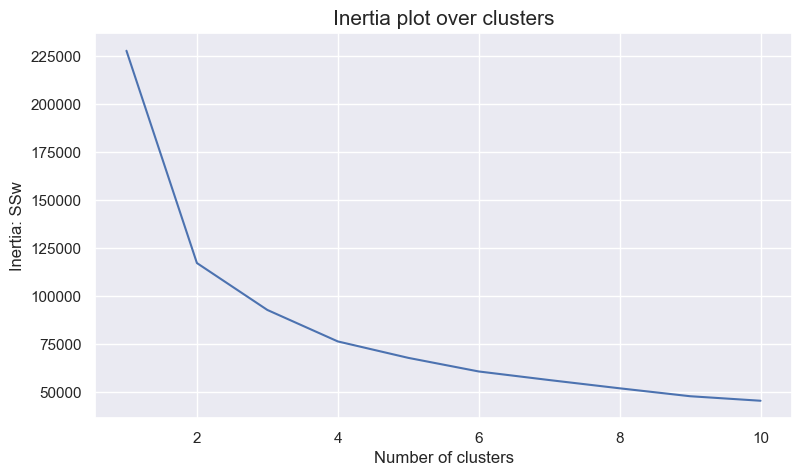

In [14]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

---

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

---


If $b > a$, then what?

Then the sample is closer to the points in the cluster it is assigned to (compared to the points in the next nearest cluster)

$s$ is positive

---


If $b = a$, then what?

*Then the sample is equally distant to the points in the cluster it is assigned to as well as the points in the next closest cluster*

$s$ is 0

---

If $b < a$, then what?

*Then the sample is closer to the points in the next closest cluster (compared to the points in the same cluster).*

$s$ is negative

---

**If the average value of $s$ is high, then what?**


"Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html





For n_clusters = 2, the average silhouette_score is : 0.586349952022501
For n_clusters = 3, the average silhouette_score is : 0.4909503275324814
For n_clusters = 4, the average silhouette_score is : 0.3789483420305328
For n_clusters = 5, the average silhouette_score is : 0.3726083006099771
For n_clusters = 6, the average silhouette_score is : 0.3272729236831963
For n_clusters = 7, the average silhouette_score is : 0.31748082213031836
For n_clusters = 8, the average silhouette_score is : 0.2823935353037216
For n_clusters = 9, the average silhouette_score is : 0.2968850798780844
For n_clusters = 10, the average silhouette_score is : 0.30000590558232454


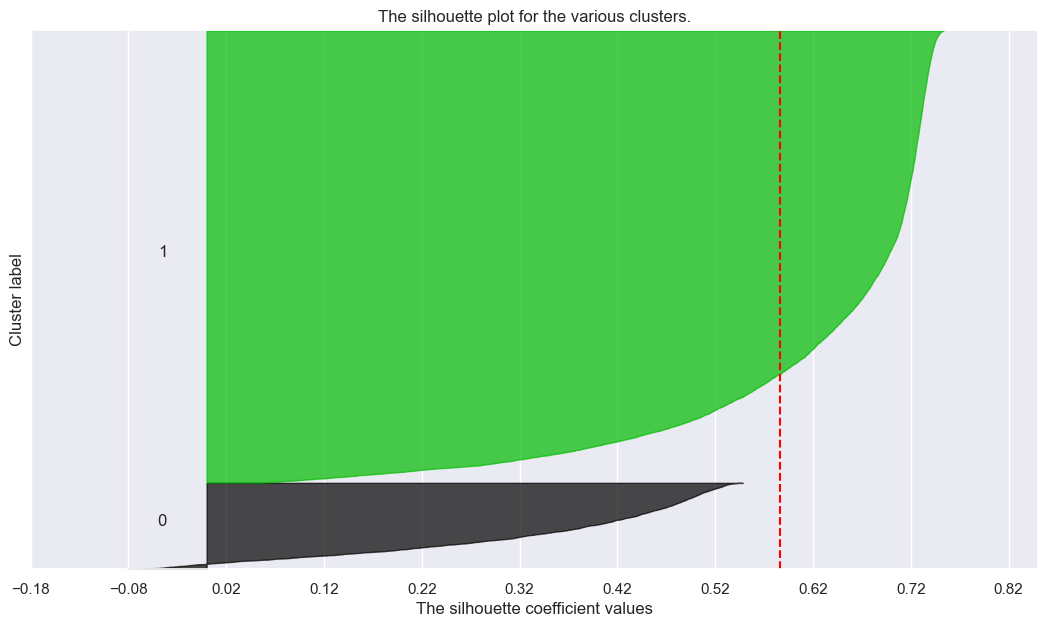

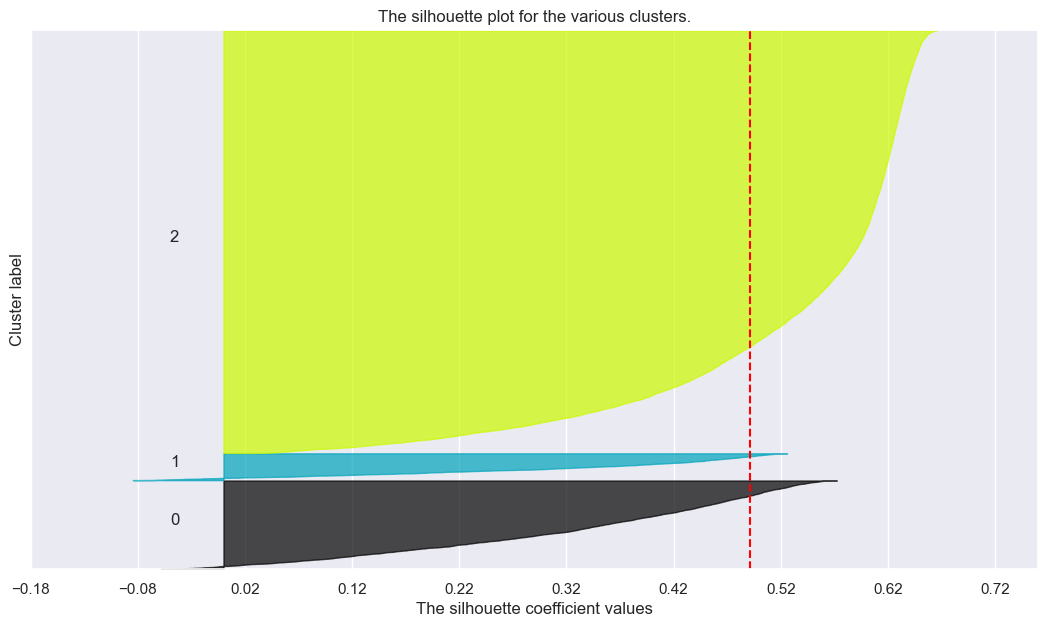

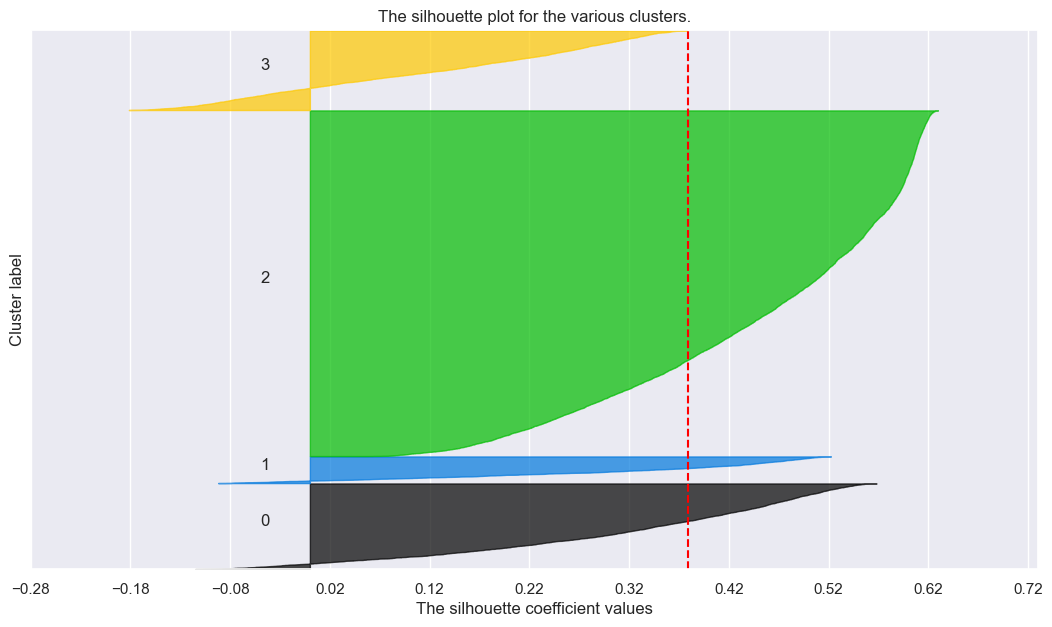

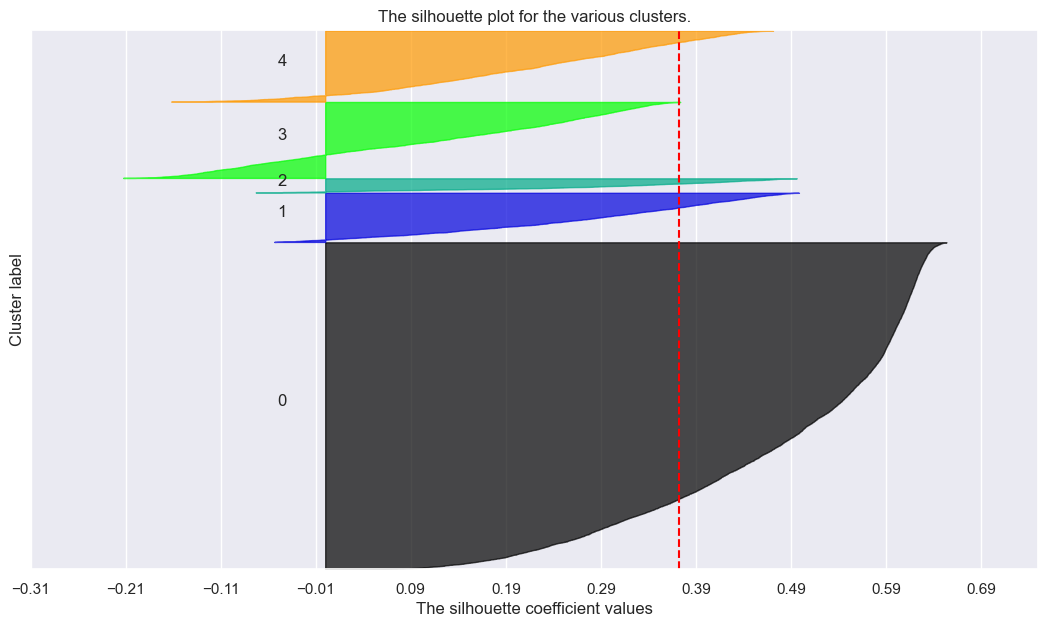

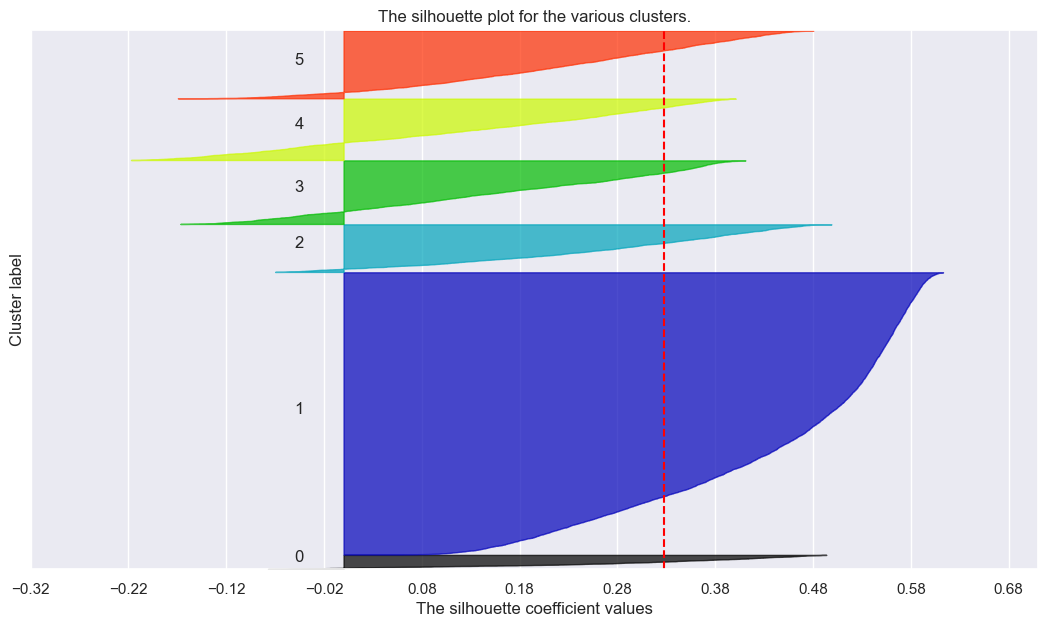

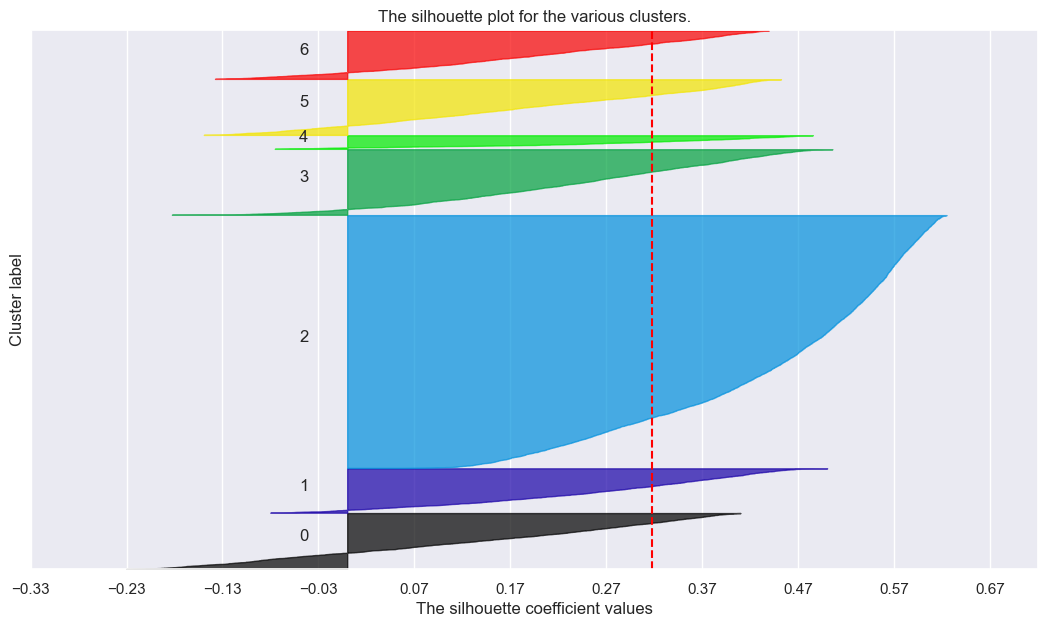

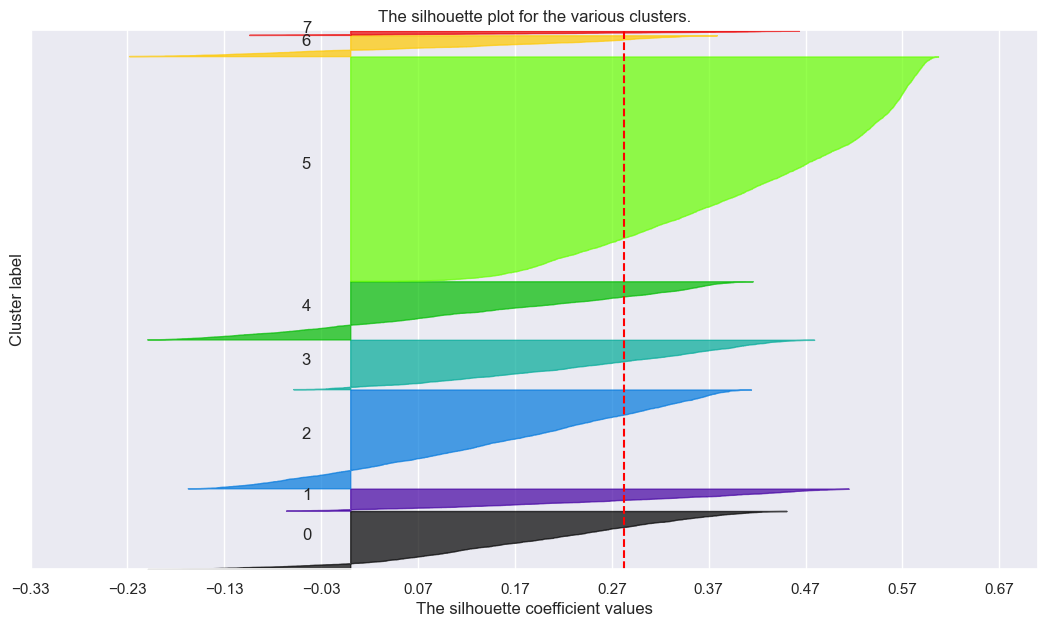

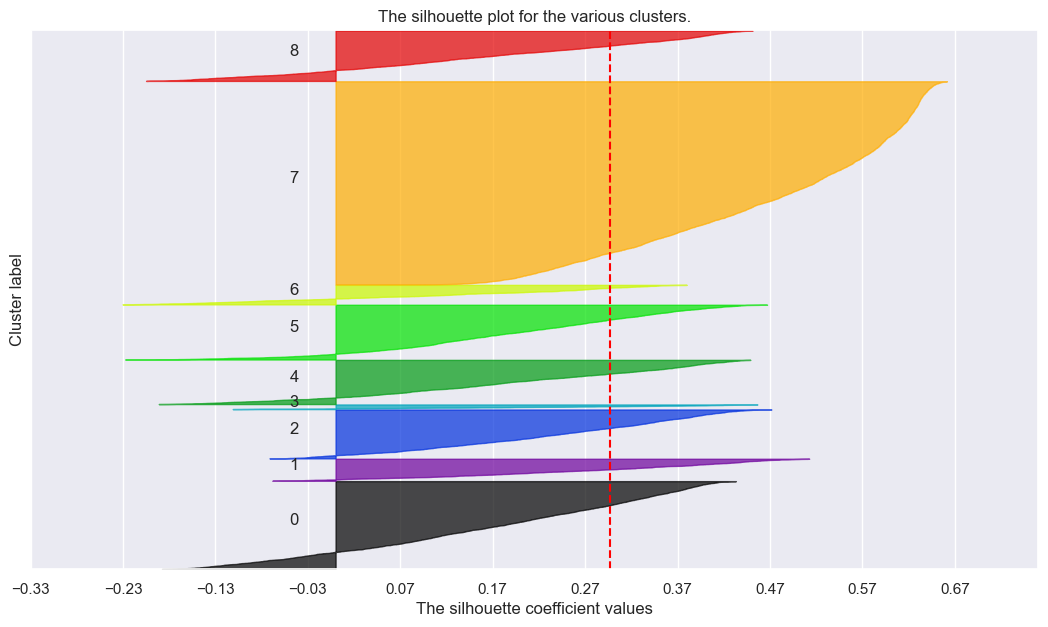

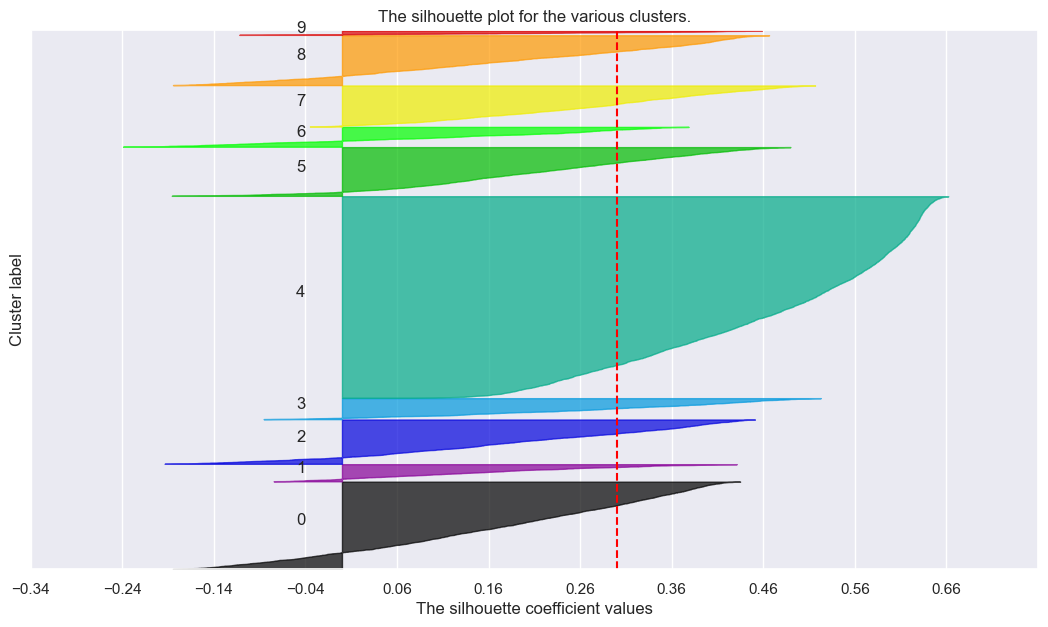

In [15]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

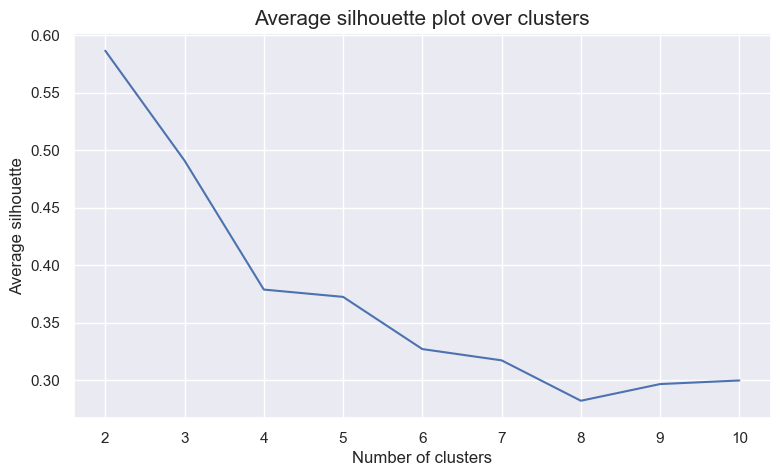

In [16]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

### Final KMeans clustering solution

In [17]:
# final cluster solution
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df[metric_features])
km_labels

array([1, 2, 2, ..., 3, 1, 3], dtype=int32)

In [18]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,ID,Age,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
labels,,,,,,,,,,,,,,,,,,,
0,17748.910213,-0.517553,0.009787,0.002979,0.722128,0.093191,0.142979,0.068511,0.033191,0.018298,0.004255,0.670213,0.680254,0.557383,2.095180,-0.073258,4.660865,-0.041456,0.595319
1,17108.556617,0.171896,0.020464,0.000000,0.714870,0.137790,0.076398,0.100955,0.012278,0.042292,0.001364,0.600273,0.522663,1.492565,2.252107,0.855238,11.611436,0.747113,0.579809
2,17422.851673,0.318974,0.052072,0.008416,0.180938,0.684725,0.039659,0.011256,0.147381,0.017042,0.001788,0.899642,0.206454,-0.095897,0.162969,-0.028147,0.115785,-0.077558,0.615927
3,17490.485806,0.851687,0.075549,0.009615,0.175366,0.798535,0.014194,0.001832,0.049908,0.066392,0.000000,0.707875,0.347039,1.227656,0.024563,1.666613,0.112190,2.011113,0.528846


In [19]:
cluster_means = df_concat.groupby('labels').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3
Age,-0.52,0.17,0.32,0.85
Contract_Duration,0.68,0.52,0.21,0.35
PercentageOfVisits,0.56,1.49,-0.10,1.23
PercentageOfClasses,2.10,2.25,0.16,0.02
Freq_Visits_Day,-0.07,0.86,-0.03,1.67
Freq_Classes_Contract,4.66,11.61,0.12,0.11
Visits_ActivePeriod,-0.04,0.75,-0.08,2.01


In [20]:
from collections import Counter
Counter(km_labels)

Counter({2: 9506, 0: 2350, 3: 2184, 1: 733})

In [21]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [22]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[metric_features])  # get total sum of squares
ssw_labels = df_concat[metric_features + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.6645831978318887

/var/folders/x6/c7bgz3zn0hg_kdmljrfw7k_m0000gn/T/ipykernel_21578/2606922159.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


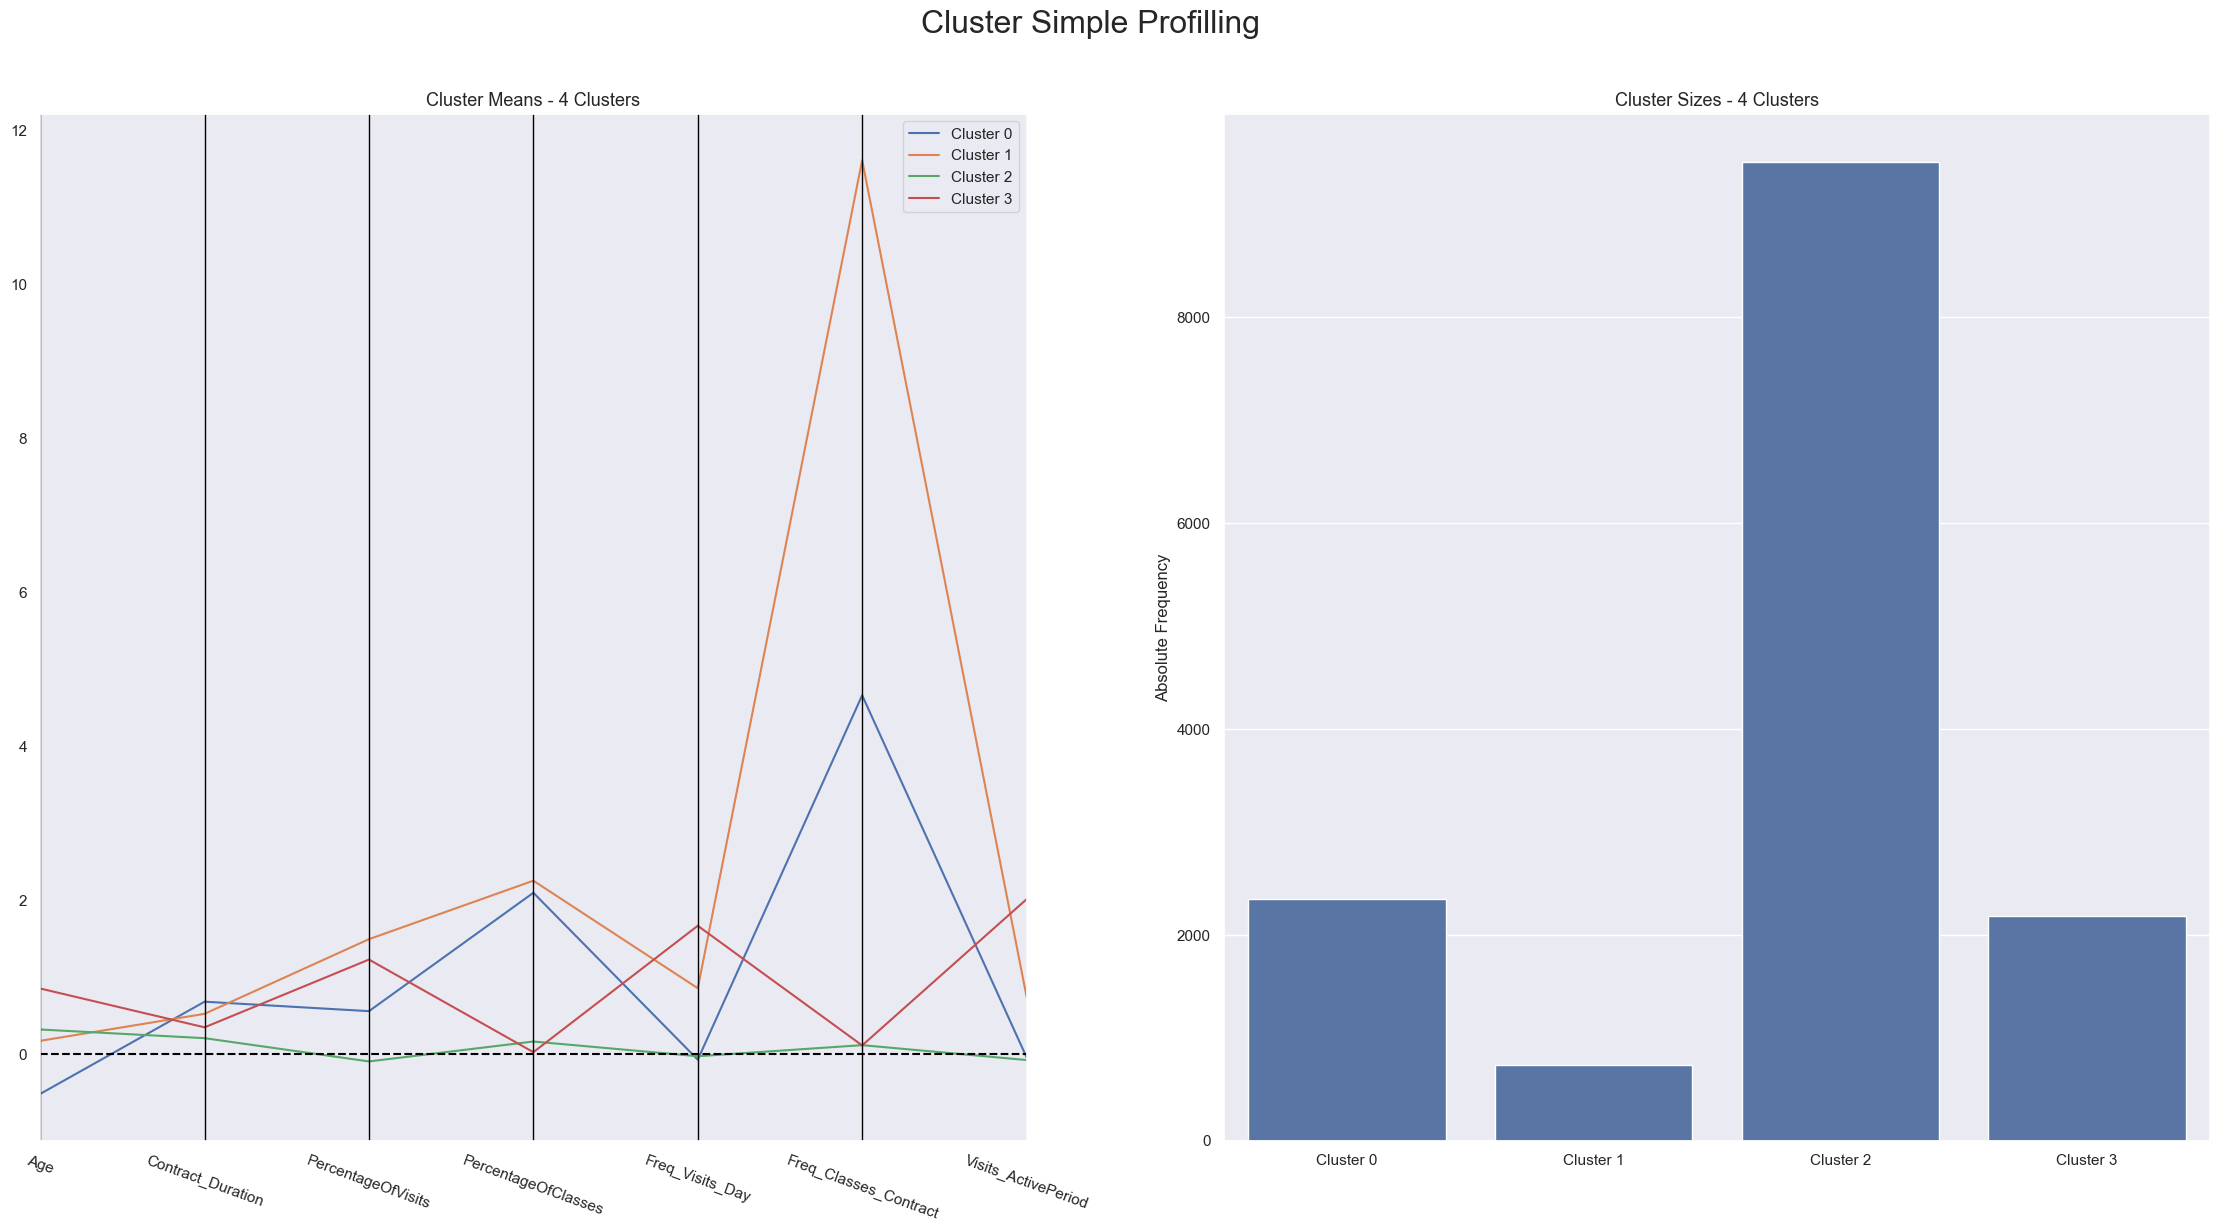

In [23]:
cluster_profiles(
    df = df_concat[metric_features + ["labels"]], 
    label_columns = ["labels"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

In [24]:
non_metric_features= ['UseByTime',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'Dropout',
 'Gender_Female']

In [25]:

df_educ = df_concat[["labels"] + non_metric_features].groupby(["labels"]).sum()
df_concat[["labels"]].groupby(["labels"]).value_counts()

labels
0    2350
1     733
2    9506
3    2184
Name: count, dtype: int64

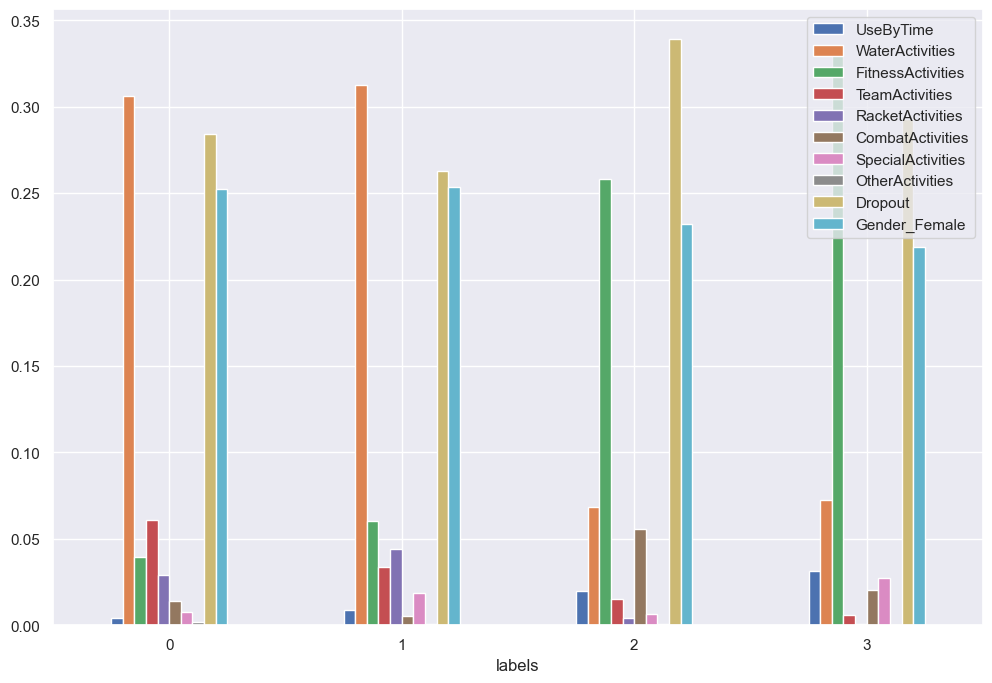

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

df_educ_pct = df_educ.apply(lambda col: col/df_educ.sum(axis=1))
df_educ_pct.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)

plt.show()

In [27]:
from sklearn.manifold import TSNE

In [28]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_concat[metric_features])
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_concat["labels"], colormap='tab10', figsize=(15,10))
plt.show()

In [ ]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_concat[metric_features + ['labels']], 'labels').drop('labels')

Age                      0.108802
Contract_Duration        0.035034
PercentageOfVisits       0.383432
PercentageOfClasses      0.712618
Freq_Visits_Day          0.442110
Freq_Classes_Contract    0.869964
Visits_ActivePeriod      0.470581
dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [ ]:
# Preparing the data
X = df_concat.drop(columns=['labels'])
y = df_concat.labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 93.54% of the customers correctly
